# 1.5 Vektordaten & Rasterdaten

### Shapely

http://toblerity.org/shapely
http://toblerity.org/shapely/manual.html

Shapely is a BSD-licensed Python package for **manipulation** and **analysis** of **planar geometric objects**. 

* Shapely is **not** concerned with data formats or coordinate systems.
* Shapely is based on the widely deployed GEOS (the engine of PostGIS) and JTS (from which GEOS is ported) libraries.

### Simple Feature Access

Shapely unterstützt die folgenden Features:

* Point
* LineString
* LinearRing          
* Polygon
* MultiLineString
* MultiPoint
* MultiPolygon

### Polygon Operationen

In [1]:
from shapely.geometry import Polygon, Point, MultiPolygon

polygon1 = Polygon([(30, 10), (40, 40), (20, 35), (10, 20), (30, 10)])

print(f"Polygon Fläche: {polygon1.area}, Länge: {polygon1.length}") 

Polygon Fläche: 475.0, Länge: 92.62674088208993


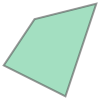

In [2]:
polygon1

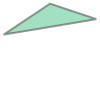

In [3]:
polygon2 = Polygon([(20,20),(80,30),(50,40),(20,20)])
polygon2

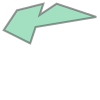

In [4]:
polygon2.union(polygon1)

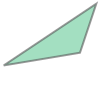

In [5]:
polygon2.intersection(polygon1)

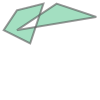

In [6]:
polygon2.symmetric_difference(polygon1)

In [7]:
result = polygon2.symmetric_difference(polygon1)

print(f"Fläche: {result.area}, Länge: {result.length}")

Fläche: 803.9915966386554, Länge: 221.13265554139582


In [8]:
result.wkt
# well-known text

'MULTIPOLYGON (((20 20, 34.11764705882353 22.35294117647059, 30 10, 10 20, 20 35, 40 40, 37.14285714285715 31.42857142857143, 20 20)), ((37.14285714285715 31.42857142857143, 50 40, 80 30, 34.11764705882353 22.35294117647059, 37.14285714285715 31.42857142857143)))'

In [9]:
s = 'MULTIPOLYGON (((20 20, 34.11764705882353 22.35294117647059, 30 10, 10 20, 20 35, 40 40, 37.14285714285715 31.42857142857143, 20 20)), ((37.14285714285715 31.42857142857143, 50 40, 80 30, 34.11764705882353 22.35294117647059, 37.14285714285715 31.42857142857143)))'

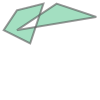

In [10]:
import shapely.wkt

mypolygon = shapely.wkt.loads(s)
mypolygon

Binäre Operationen:
    
- **contains** (Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.)
- **intersects** (Returns True if the boundary and interior of the object intersect in any way with those of the other.)
- **witin** (Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).
- **touches** (Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.)
- **crosses** (Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.)
- **equals** (Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.)

In [11]:
polygon1.intersects(polygon2)

True

In [12]:
polygon1.within(polygon2)

False

In [13]:
polygon1.equals(polygon1)

True

# Vektordaten mit Fiona / GeoPandas laden

Wir Laden schnell Vektordaten herunter:

Datensatz: Naturalearth: https://www.naturalearthdata.com/ <br/>
Lizenz: Public Domain

In [14]:
import geoutils
import zipfile
import os

if not os.path.exists("daten/packages/natural_earth_vector.gpkg"):
    ne = geoutils.geodata["natural-earth"] # URL to Natural Earth Dataset (GeoPackage Format)
    geoutils.download(ne, "daten/ne.gpkg.zip")
else:
    print("Der Datensatz ist bereits heruntergeladen")

if not os.path.exists("daten/packages/natural_earth_vector.gpkg"):
    with zipfile.ZipFile("daten/ne.gpkg.zip", 'r') as z:
        z.extractall("daten")

100% done 	[****************************************************************************************************]


Shapefiles: nur 1 Datentyp, bestehend aus 4 Files

GeoPackage: verschiedene Typen; Punkt, Line String, etc. besser gelöst

In [15]:
import fiona

filename = "daten/packages/natural_earth_vector.gpkg"
layers = fiona.listlayers(filename)
for layer in layers:
    print(layer)

ne_10m_admin_0_antarctic_claim_limit_lines
ne_10m_admin_0_antarctic_claims
ne_10m_admin_0_boundary_lines_disputed_areas
ne_10m_admin_0_boundary_lines_land
ne_10m_admin_0_boundary_lines_map_units
ne_10m_admin_0_boundary_lines_maritime_indicator
ne_10m_admin_0_countries
ne_10m_admin_0_countries_lakes
ne_10m_admin_0_disputed_areas
ne_10m_admin_0_disputed_areas_scale_rank_minor_islands
ne_10m_admin_0_label_points
ne_10m_admin_0_map_subunits
ne_10m_admin_0_map_units
ne_10m_admin_0_pacific_groupings
ne_10m_admin_0_scale_rank
ne_10m_admin_0_scale_rank_minor_islands
ne_10m_admin_0_seams
ne_10m_admin_0_sovereignty
ne_10m_admin_1_label_points
ne_10m_admin_1_label_points_details
ne_10m_admin_1_seams
ne_10m_admin_1_states_provinces
ne_10m_admin_1_states_provinces_lakes
ne_10m_admin_1_states_provinces_lines
ne_10m_admin_1_states_provinces_scale_rank
ne_10m_admin_1_states_provinces_scale_rank_minor_islands
ne_10m_airports
ne_10m_parks_and_protected_lands_area
ne_10m_parks_and_protected_lands_line
ne

In [16]:
import geopandas as gpd

filename = "daten/packages/natural_earth_vector.gpkg"
layer = "ne_110m_admin_0_countries"

df = gpd.read_file(filename, layer=layer)

In [19]:
df

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,세르비아,Servië,Serbia,Sérvia,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,몬테네그로,Montenegro,Czarnogóra,Montenegro,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,...,코소보,Kosovo,Kosowo,Kosovo,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,트리니다드 토바고,Trinidad en Tobago,Trynidad i Tobago,Trinidad e Tobago,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Und mit GeoPlot darstellen:

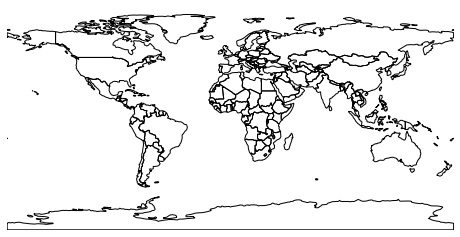

In [17]:
import geoplot
%matplotlib inline

geoplot.polyplot(df);

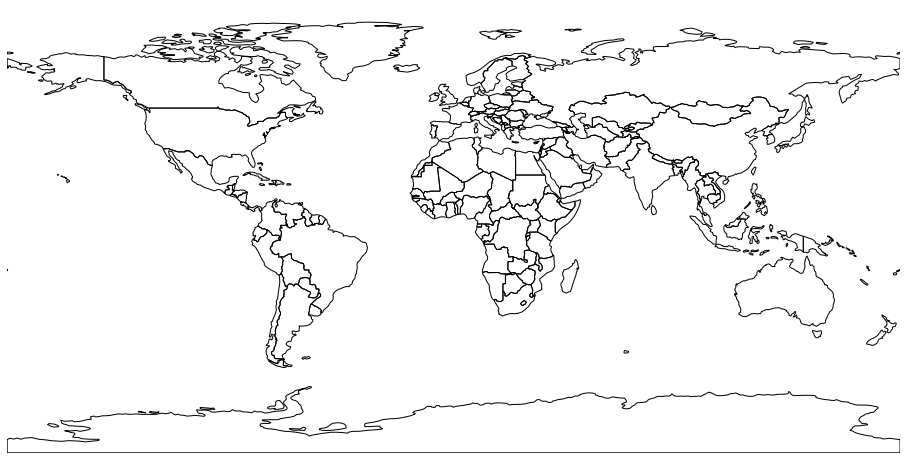

In [18]:
geoplot.polyplot(df, figsize=(16, 9));

/opt/anaconda3/envs/geopython/lib/python3.7/site-packages/geoplot/geoplot.py:715: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '
/opt/anaconda3/envs/geopython/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


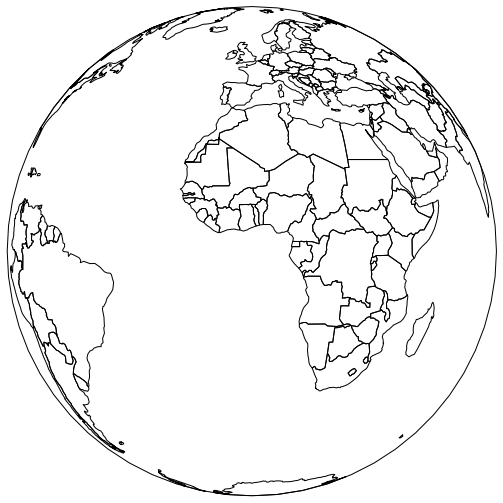

In [20]:
ax = geoplot.polyplot( df, projection=geoplot.crs.Orthographic(), figsize=(16, 9) )
ax.outline_patch.set_visible(True);

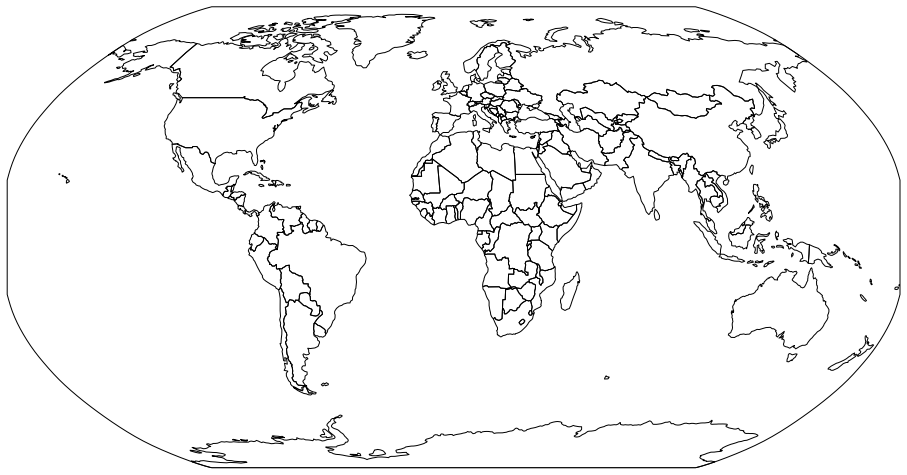

In [21]:
robinson = geoplot.crs.Robinson()

ax = geoplot.polyplot( df, projection=robinson, figsize=(16, 9) )
ax.outline_patch.set_visible(True);

/opt/anaconda3/envs/geopython/lib/python3.7/site-packages/geoplot/geoplot.py:720: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '


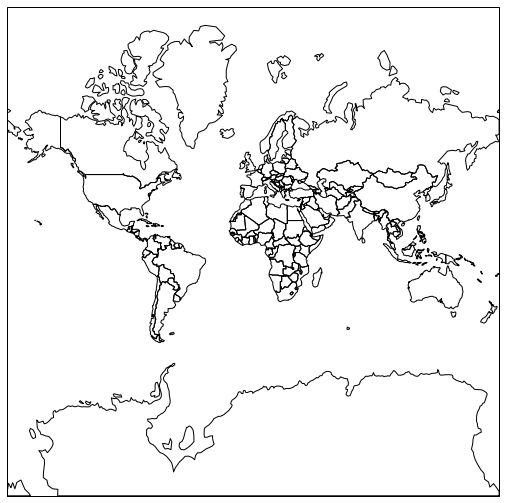

In [22]:
merc = geoplot.crs.Mercator(min_latitude=-85, max_latitude=85)

ax = geoplot.polyplot( df, projection=merc, figsize=(16, 9) )
ax.outline_patch.set_visible(True)

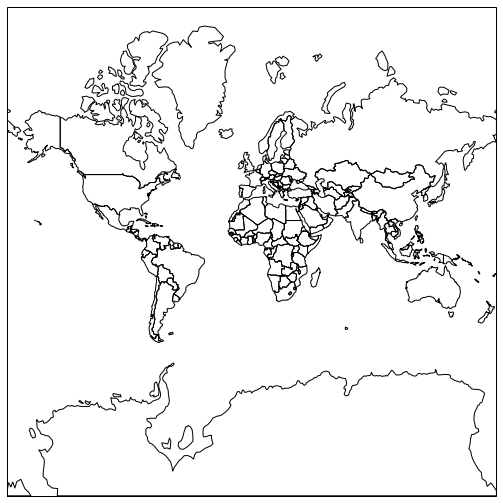

In [23]:
webmerc = geoplot.crs.WebMercator()

ax = geoplot.polyplot( df, projection=webmerc, figsize=(16, 9) )
ax.outline_patch.set_visible(True)

### Verwenden von GeoPandas um Vektordaten zu laden

In [24]:
import geopandas as gpd

airports = gpd.read_file("daten/packages/natural_earth_vector.gpkg", layer="ne_50m_airports")

In [25]:
airports.head()

,scalerank,featurecla,type,name,abbrev,location,gps_code,iata_code,wikipedia,natlscale,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,2,Airport,major,Hong Kong Int'l,HKG,terminal,VHHH,HKG,http://en.wikipedia.org/wiki/Hong_Kong_Interna...,150.0,...,Port lotniczy Hongkong,Aeroporto Internacional de Hong Kong,Чхеклапкок,Hong Kong International Airport,Hong Kong Uluslararası Havalimanı,Sân bay quốc tế Hồng Kông,香港國際機場,4,1159127187,POINT (113.93502 22.31533)
1,2,Airport,major,Taoyuan,TPE,terminal,RCTP,TPE,http://en.wikipedia.org/wiki/Taiwan_Taoyuan_In...,150.0,...,Port lotniczy Tajpej-Taiwan Taoyuan,Aeroporto Internacional Chiang Kai-shek,Тайвань-Таоюань,Taiwan Taoyuan Internationella Flygplats,Tayvan Taoyuan Uluslararası Havalimanı,Sân bay quốc tế Đào Viên Đài Loan,臺灣桃園國際機場,4,1159127201,POINT (121.23137 25.07674)
2,2,Airport,major,Schiphol,AMS,terminal,EHAM,AMS,http://en.wikipedia.org/wiki/Amsterdam_Schipho...,150.0,...,None,None,None,None,None,None,None,2,1159127211,POINT (4.76438 52.30893)
3,2,Airport,major,Singapore Changi,SIN,terminal,WSSS,SIN,http://en.wikipedia.org/wiki/Singapore_Changi_...,150.0,...,Port lotniczy Singapur-Changi,Aeroporto de Singapura,Чанги,Singapore Changi Airport,Singapur Changi Havalimanı,Sân bay quốc tế Singapore Changi,新加坡樟宜机场,4,1159127223,POINT (103.98641 1.35616)
4,2,Airport,major,London Heathrow,LHR,parking,EGLL,LHR,http://en.wikipedia.org/wiki/London_Heathrow_A...,150.0,...,Port lotniczy Londyn-Heathrow,Aeroporto de Londres Heathrow,Хитроу,London-Heathrow flygplats,Heathrow Havalimanı,Sân bay London Heathrow,伦敦希思罗机场,4,1159127237,POINT (-0.45316 51.47100)


<AxesSubplot:>

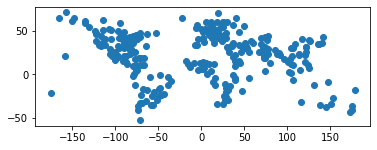

In [26]:
airports.plot()

Kombination mit geoplot:

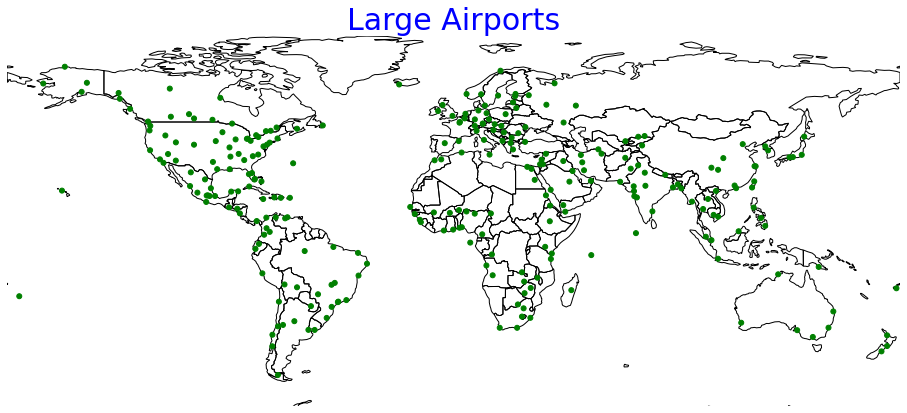

In [27]:
ax = geoplot.polyplot(df, figsize=(16, 9));
ax.set_title("Large Airports", fontsize=30, color="blue")
geoplot.pointplot(airports, ax=ax, color="green");

## Generalisierte Kantons- / Gemeindegrenzen

https://www.bfs.admin.ch/bfs/de/home/dienstleistungen/geostat/geodaten-bundesstatistik/administrative-grenzen/generalisierte-gemeindegrenzen.html

In [28]:
url = "https://www.bfs.admin.ch/bfsstatic/dam/assets/16804410/master"

In [29]:
import urllib
import shutil

filename, headers = urllib.request.urlretrieve(url, "daten/gemeindegrenzen.zip")
shutil.unpack_archive("daten/gemeindegrenzen.zip", "daten/gemeindegrenzen")

In [30]:
#g1k21 sind die Kantone
cantons = gpd.read_file("daten/gemeindegrenzen/ggg_2021-LV95/shp/g1k21.shp", encoding="utf-8")
cantons.head()

,KTNR,KTNAME,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,...,Z_MED,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,Shape_Leng,Shape_Area,geometry
0,1,Zürich,4,172894,669245,716900,223896,283343,691800,252000,...,505,2669245,2716900,1223896,1283343,2691800,1252000,284843.337695,1.729058e+09,"POLYGON ((2692443.000 1281183.000, 2692994.000..."
1,2,Bern / Berne,2,595951,556241,677745,130585,243835,614200,185600,...,979,2556241,2677745,1130585,1243835,2614200,1185600,722397.490074,5.960202e+09,"MULTIPOLYGON (((2573533.000 1194765.000, 25740..."
2,3,Luzern,6,149353,630128,681764,180568,237691,651000,213100,...,680,2630128,2681764,1180568,1237691,2651000,1213100,266151.566518,1.493025e+09,"POLYGON ((2662029.000 1237691.000, 2662264.000..."
3,4,Uri,6,107654,673345,715796,153451,205339,690800,180700,...,1976,2673345,2715796,1153451,1205339,2690800,1180700,208229.464659,1.076697e+09,"POLYGON ((2688457.000 1203340.000, 2688740.000..."
4,5,Schwyz,6,90788,672167,718719,193657,231067,700100,213100,...,1053,2672167,2718719,1193657,1231067,2700100,1213100,185943.261812,9.077454e+08,"POLYGON ((2704723.000 1229925.000, 2706210.000..."


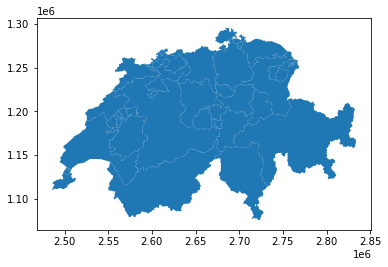

In [31]:
cantons.plot();

Neuer Datensatz mit weniger Spalten

In [32]:
cantons2 = cantons[['KTNR','KTNAME','AREA_HA', 'geometry']]
cantons2.head()

,KTNR,KTNAME,AREA_HA,geometry
0,1,Zürich,172894,"POLYGON ((2692443.000 1281183.000, 2692994.000..."
1,2,Bern / Berne,595951,"MULTIPOLYGON (((2573533.000 1194765.000, 25740..."
2,3,Luzern,149353,"POLYGON ((2662029.000 1237691.000, 2662264.000..."
3,4,Uri,107654,"POLYGON ((2688457.000 1203340.000, 2688740.000..."
4,5,Schwyz,90788,"POLYGON ((2704723.000 1229925.000, 2706210.000..."


In [35]:
# das geht auch:
cantons2[cantons2['KTNAME']=='Zürich']

,KTNR,KTNAME,AREA_HA,geometry
0,1,Zürich,172894,"POLYGON ((2692443.000 1281183.000, 2692994.000..."


In [33]:
zh = cantons2.query("KTNAME == 'Zürich'")
zh

,KTNR,KTNAME,AREA_HA,geometry
0,1,Zürich,172894,"POLYGON ((2692443.000 1281183.000, 2692994.000..."


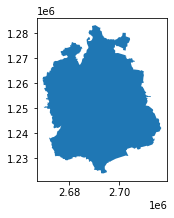

In [36]:
zh.plot(figsize=(4,3));

In [37]:
cantons.crs

<Projected CRS: EPSG:2056>
Name: CH1903+ / LV95
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe - Liechtenstein and Switzerland
- bounds: (5.96, 45.82, 10.49, 47.81)
Coordinate Operation:
- name: Swiss Oblique Mercator 1995
- method: Hotine Oblique Mercator (variant B)
Datum: CH1903+
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

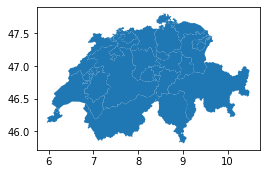

In [38]:
# zu WGS84 (Grad)
cantonsWGS84 = cantons.to_crs(epsg=4326)
cantonsWGS84.plot(figsize=(4,3));

In [39]:
cantonsWGS84.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
import folium

center = [47.534018, 7.638423]
mymap = folium.Map(center, zoom_start=7, tiles='cartodbpositron')  
# muss WGS 84 sein
folium.GeoJson(cantonsWGS84).add_to(mymap)

mymap

In [41]:
def my_color_function(feature):
    area = feature["properties"]["AREA_HA"]
    
    color = "#000000"
    
    if area >10000:
        color = "#110000"
    if area >40000:
        color = "#440000"
    if area >70000:
        color = "#77FF00"
    if area >100000:
        color = "#AA0000"
    if area >130000:
        color = "#DDFF00"
    if area >160000:
        color = "#FF0000"
        
    return color

center = [47.534018, 7.638423]
mymap = folium.Map(center, zoom_start=6, tiles='cartodbpositron')   


folium.GeoJson(cantonsWGS84,style_function=lambda feature: {
        'fillColor': my_color_function(feature),
        'color': 'black',
        'weight': 1,
        'dashArray': '5, 5'
    }).add_to(mymap)

mymap

### Gemeinden Laden


In [42]:
municipalities = gpd.read_file("daten/gemeindegrenzen/ggg_2021-LV95/shp/g1g21_18042021.shp", encoding="utf-8")
municipalities.head()

,GMDHISTID,GMDNR,GMDNAME,BZHISTID,BZNR,KTNR,GRNR,AREA_HA,E_MIN,E_MAX,...,X_MIN,X_MAX,Y_MIN,Y_MAX,X_CNTR,Y_CNTR,Shape_Leng,Shape_Le_1,Shape_Area,geometry
0,13256,1,Aeugst am Albis,10053,101,1,4,791,2678111,2681155,...,678111,681155,234561,238544,679300,235700,13087.335729,13087.366580,7.958656e+06,"POLYGON ((2678219.000 1235219.000, 2678439.000..."
1,12497,10,Obfelden,10053,101,1,4,754,2672793,2676119,...,672793,676119,232987,237091,675100,235300,13856.838227,13856.810238,7.557358e+06,"POLYGON ((2673859.000 1233032.000, 2673590.000..."
2,10383,100,Stadel,10080,104,1,4,1289,2675397,2679921,...,675397,679921,263209,268199,677500,264700,16413.205434,16413.277507,1.279356e+07,"POLYGON ((2677040.000 1263227.000, 2676832.000..."
3,15557,1001,Doppleschwand,10303,316,3,6,695,2645094,2647808,...,645094,647808,205150,209224,646900,207700,11719.931558,11720.046448,7.165479e+06,"POLYGON ((2647222.000 1205116.000, 2646923.000..."
4,15561,1002,Entlebuch,10303,316,3,6,5690,2643451,2655295,...,643451,655295,193732,209554,647600,204800,53608.710921,53608.992129,5.674259e+07,"MULTIPOLYGON (((2644443.000 1202999.000, 26438..."


In [43]:
municipalities.shape

(2172, 29)

In [44]:
municipalities.columns

Index(['GMDHISTID', 'GMDNR', 'GMDNAME', 'BZHISTID', 'BZNR', 'KTNR', 'GRNR',
       'AREA_HA', 'E_MIN', 'E_MAX', 'N_MIN', 'N_MAX', 'E_CNTR', 'N_CNTR',
       'Z_MIN', 'Z_MAX', 'Z_AVG', 'Z_MED', 'Z_CNTR', 'X_MIN', 'X_MAX', 'Y_MIN',
       'Y_MAX', 'X_CNTR', 'Y_CNTR', 'Shape_Leng', 'Shape_Le_1', 'Shape_Area',
       'geometry'],
      dtype='object')

In [45]:
municipalities2 = municipalities[['GMDNR', 'GMDNAME', 'KTNR', 'AREA_HA', 'geometry']]

In [46]:
municipalities2.head()

,GMDNR,GMDNAME,KTNR,AREA_HA,geometry
0,1,Aeugst am Albis,1,791,"POLYGON ((2678219.000 1235219.000, 2678439.000..."
1,10,Obfelden,1,754,"POLYGON ((2673859.000 1233032.000, 2673590.000..."
2,100,Stadel,1,1289,"POLYGON ((2677040.000 1263227.000, 2676832.000..."
3,1001,Doppleschwand,3,695,"POLYGON ((2647222.000 1205116.000, 2646923.000..."
4,1002,Entlebuch,3,5690,"MULTIPOLYGON (((2644443.000 1202999.000, 26438..."


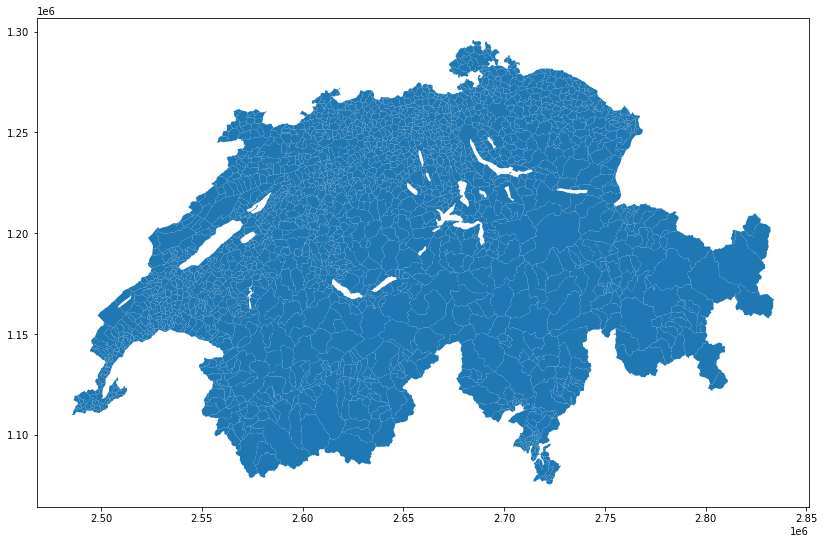

In [47]:
municipalities2.plot(figsize=(16,9));

In [48]:
mun = municipalities2

mun[mun.AREA_HA > 25000]

,GMDNR,GMDNAME,KTNR,AREA_HA,geometry
183,1631,Glarus Süd,8,43003,"POLYGON ((2712665.000 1185503.000, 2712048.000..."
754,3543,Surses,18,32377,"POLYGON ((2769114.000 1165165.000, 2769083.000..."
803,3746,Zernez,18,34404,"POLYGON ((2802701.899 1192061.975, 2803370.000..."
805,3762,Scuol,18,43861,"POLYGON ((2827177.406 1176997.203, 2826668.110..."
818,3792,Bregaglia,18,25142,"POLYGON ((2755110.249 1142501.131, 2755873.000..."
837,3851,Davos,18,28400,"POLYGON ((2780472.000 1189520.000, 2781305.000..."
2167,6037,Val de Bagnes,23,30191,"POLYGON ((2583405.000 1108013.000, 2585000.000..."


<AxesSubplot:>

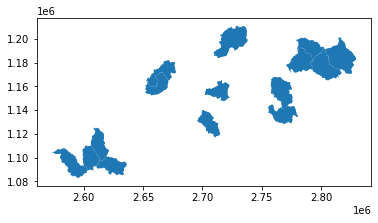

In [49]:
mun[mun.AREA_HA > 20000].plot()

In [50]:
mun.query("AREA_HA > 25000 and AREA_HA < 30000")

,GMDNR,GMDNAME,KTNR,AREA_HA,geometry
818,3792,Bregaglia,18,25142,"POLYGON ((2755110.249 1142501.131, 2755873.000..."
837,3851,Davos,18,28400,"POLYGON ((2780472.000 1189520.000, 2781305.000..."


In [51]:
mun.query("GMDNAME == 'Zürich'")

,GMDNR,GMDNAME,KTNR,AREA_HA,geometry
468,261,Zürich,1,8793,"POLYGON ((2682965.000 1242721.000, 2682728.000..."


<AxesSubplot:>

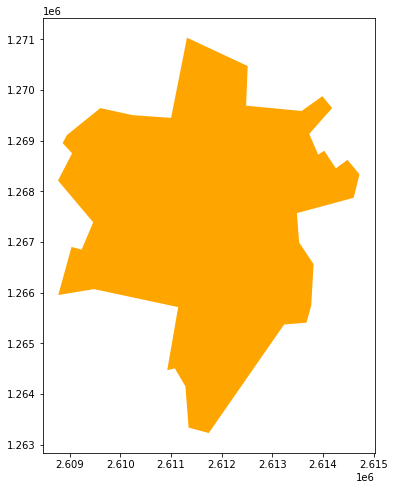

In [52]:
mun.query("GMDNAME == 'Basel'").plot(figsize=(16,8), color="orange")

<AxesSubplot:>

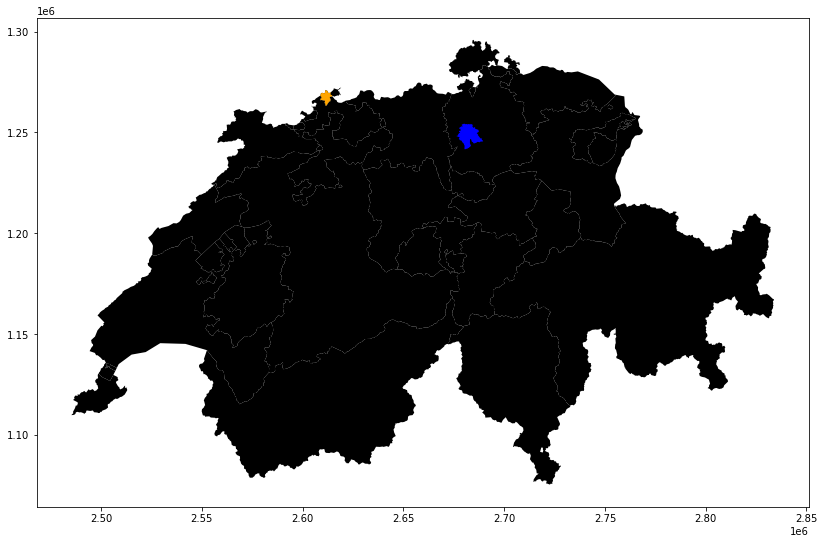

In [53]:
cantonplot = cantons.plot(figsize=(15,9), color="black")

basel = mun.query("GMDNAME == 'Basel'")
zurich = mun.query("GMDNAME == 'Zürich'")

basel.plot(ax=cantonplot, color="orange")
zurich.plot(ax=cantonplot, color="blue")

## Rasterdaten

In [54]:
path = "http://data.geopython.xyz/bluemarble/"
world = "world.tif"
worldfile = "world.tfw"

geoutils.download(path+world, "daten/world.tif")
geoutils.download(path+worldfile, "daten/world.tfw")

100% done 	[****************************************************************************************************]
100% done 	[****************************************************************************************************]


#### Worldfile

* Image Size is ist 2048 x 1024
* Extent is (-180, -90) to (+180, +90)


* Line 1: Pixel size in x direction: 360/2048 
* Line 2: 0 (no Rotation)
* Line 3: 0 (no Rotation)
* Line 4: Pixel size in y direction: -180/1024 
* Line 5: x-coordinate of the **center** UL Pixel
* Line 6: y-coordinate of the **center** UL Pixel

In [55]:
import rasterio

In [56]:
dataset = rasterio.open('daten/world.tif')

In [57]:
dataset.name

'daten/world.tif'

In [58]:
# rot grün blau
dataset.count

3

In [59]:
dataset.indexes

(1, 2, 3)

In [60]:
dataset.width

2048

In [61]:
dataset.height

1024

In [62]:
dataset.crs

In [63]:
dataset.transform 

Affine(0.17578125, 0.0, -180.0,
       0.0, -0.17578125, 90.0)

In [64]:
~dataset.transform

Affine(5.688888888888889, 0.0, 1024.0,
       0.0, -5.688888888888889, 512.0)

In [65]:
dataset.bounds

BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)

In [66]:
print(dataset.bounds.left)
print(dataset.bounds.bottom)
print(dataset.bounds.right)
print(dataset.bounds.top)

-180.0
-90.0
180.0
90.0


In [67]:
# sie nehmen eine andere "Ecke"
dataset.transform * (0, 0)  # Transformation Pixel(0,0)

(-180.0, 90.0)

In [68]:
~dataset.transform * (0, 0) # Inverse Transformation WGS84(0,0)

(1024.0, 512.0)

In [69]:
px,py = ~dataset.transform * (8.539434, 47.378109)
print(px,py)

1072.5798912 242.4712021333333


In [70]:
import matplotlib.pyplot as plt
import numpy as np

In [71]:
dataset = rasterio.open("daten/world.tif", 'r')

r = dataset.read(1)
g = dataset.read(2)
b = dataset.read(3)

In [72]:
rgb = np.dstack((r,g,b))  #  (r,g,b) Tupel für jeden Pixel erstellen

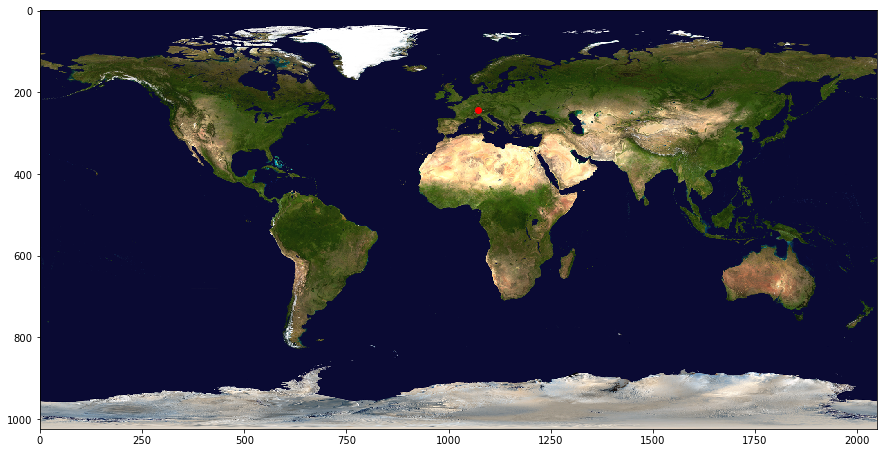

In [73]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest')
ax.plot(px,py, 'ro');

### Ausschnitte lesen

In [74]:
import rasterio 

dataset = rasterio.open('daten/world.tif')

In [75]:
w = ((256,512),(1024,1280))

r = dataset.read(1, window=w)
g = dataset.read(2, window=w)
b = dataset.read(3, window=w)

In [76]:
rgb = np.dstack((r,g,b))

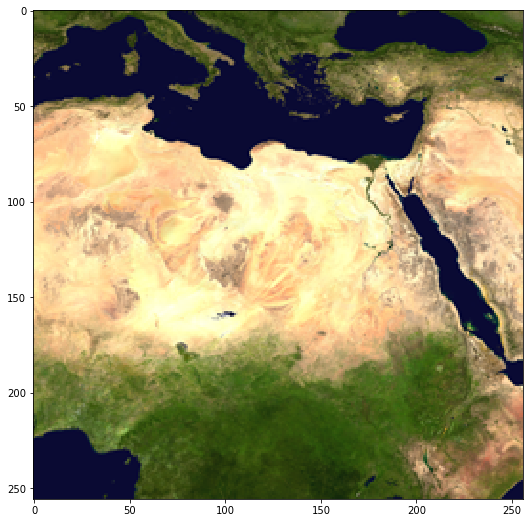

In [77]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='nearest');